# Great crested newt eDNA metabarcoding data processing

I will use metaBEAT, a tool tailored towards reproducible and efficient analyses of metabarcoding data that was developed by Christoph Hahn at University of Hull. The pipeline is still under active development and will likely be extended further in the future. The pipeline is available in a Docker container with all necessary dependencies. The Docker image is building on ReproPhylo.

The data I will be analyzing are 12S rRNA sequences amplified from eDNA samples collected from ponds across the UK. The experiment was designed determine the sensitivity of eDNA metabarcoding for rare species, such as great crested newt, and assess the potential of eDNA metabarcoding to assess vertebrate community composition in freshwater ponds. 

The metaBEAT tool is designed as a wrapper around a complete analysis from raw data, performing (optionally) de-multiplexing, quality filtering, clustering along the way, to OTU tables in biom format. It currently supports BLAST, Kraken and phylogenetic placement (pplacer). Further approaches will be included in the future to allow for efficient and standardized comparative assessments of all approaches.

metBEAT offers a large number of options. 

# Data input

This notebook will perform basic processing (read trimming, -merging-, chimera removal) of the eDNA data. Clustering and taxonomic assignment will be performed in a separate notebook.

Minimum input for an analysis is a set of query sequences in one or several files (accepted are a number of file formats, e.g. fasta, fastq). These will be run through the pipeline sequentially.

Information on the nature and location of the query sequence files must be provided in a separate tab-delimited text file via the -Q flags.

Each line in this text file should look as follows:
unique sample_ID <tab> format <tab> file1 <tab> file2

The required text files can be generated in any text editor. So theoretically, nano could be used in the terminal to construct the text file. For reproducibility and ease, a simple program can be used to generate the required file.

In the cell below, it is produced using a simple python script.
The script will list all files in the location to which you've downloaded your Illumina data (specified via the 'datadir' variable. It assumes that there is a file ending in _1.fastq for each sample. For each such file, it will extract the sample name from the filename and format the required line for the text file accordingly. The resulting file is called Querymap.txt (specified in the 'to' variable).

In [1]:
!ls -1 ../raw_reads/

B1_S51_L001_R1_001.fastq.gz
B1_S51_L001_R2_001.fastq.gz
B2_S63_L001_R1_001.fastq.gz
B2_S63_L001_R2_001.fastq.gz
B3_S75_L001_R1_001.fastq.gz
B3_S75_L001_R2_001.fastq.gz
B4_S87_L001_R1_001.fastq.gz
B4_S87_L001_R2_001.fastq.gz
Blank_S372_L001_R1_001.fastq.gz
Blank_S372_L001_R2_001.fastq.gz
F100_S154_L001_R1_001.fastq.gz
F100_S154_L001_R2_001.fastq.gz
F101_S166_L001_R1_001.fastq.gz
F101_S166_L001_R2_001.fastq.gz
F102_S178_L001_R1_001.fastq.gz
F102_S178_L001_R2_001.fastq.gz
F103_S107_L001_R1_001.fastq.gz
F103_S107_L001_R2_001.fastq.gz
F104_S119_L001_R1_001.fastq.gz
F104_S119_L001_R2_001.fastq.gz
F105_S131_L001_R1_001.fastq.gz
F105_S131_L001_R2_001.fastq.gz
F106_S143_L001_R1_001.fastq.gz
F106_S143_L001_R2_001.fastq.gz
F107_S155_L001_R1_001.fastq.gz
F107_S155_L001_R2_001.fastq.gz
F108_S167_L001_R1_001.fastq.gz
F108_S167_L001_R2_001.fastq.gz
F109_S179_L001_R1_001.fastq.gz
F109_S179_L001_R2_001.fastq.gz
F10_S66_L001_R1_001.fastq.gz
F10_S66_L001_R2_001.fastq.gz
F110_S108_L001_R1_001.fastq.gz
F11

In [3]:
!echo "SampleID" > ../1-trimming/Sample_names.tsv

In [4]:
%%bash
for a in $(ls ../raw_reads/ | grep "R1" | cut -d 'S' -f 1)
do 
   SampleID=$a
   
   echo -e "$SampleID"
done >> ../1-trimming/Sample_names.tsv

In [5]:
!cat ../1-trimming/Sample_names.tsv

SampleID
B1_
B2_
B3_
B4_
Blank_
F100_
F101_
F102_
F103_
F104_
F105_
F106_
F107_
F108_
F109_
F10_
F110_
F111_
F112_
F113_
F114_
F115_
F116_
F117_
F118_
F119_
F11_
F120_
F121_
F122_
F123_
F124_
F125_
F126_
F127_
F128_
F129_
F12_
F130_
F131_
F132_
F133_
F134_
F135_
F136_
F137_
F138_
F139_
F13_
F140_
F141_
F142_
F143_
F144_
F145_
F146_
F147_
F148_
F149_
F14_
F150_
F151_
F152_
F153_
F154_
F155_
F156_
F157_
F158_
F159_
F15_
F160_
F161_
F162_
F163_
F164_
F165_
F166_
F167_
F168_
F169_
F16_
F170_
F171_
F172_
F173_
F174_
F175_
F176_
F177_
F178_
F179_
F17_
F180_
F181_
F182_
F183_
F184_
F185_
F186_
F187_
F188_
F189_
F18_
F190_
F191_
F192_
F193_
F194_
F195_
F196_
F197_
F198_
F199_
F19_
F1_
F200_
F201_
F202_
F203_
F204_
F205_
F206_
F207_
F208_
F209_
F20_
F210_
F211_
F212_
F213_
F214_
F215_
F216_
F217_
F218_
F219_
F21_
F220_
F221_
F222_
F223_
F224_
F225_
F226_
F227_
F228_
F229_
F22_
F230_
F231_
F232_
F233_
F234_
F235_
F236_
F237_
F238_
F239_
F23_
F240_
F241_
F242_
F243_
F244_
F245_
F246_
F247_
F248_


In [6]:
%%bash

for a in $(cat ../1-trimming/Sample_names.tsv | grep "SampleID" -v)
do
    R1=$(ls -1 ../raw_reads/$a* | grep "_R1")
    R2=$(ls -1  ../raw_reads/$a* | grep "_R2")

    echo -e "$a\tfastq\t$R1\t$R2"
done > Querymap.txt

In [7]:
!head -n 4 Querymap.txt

B1_	fastq	../raw_reads/B1_S51_L001_R1_001.fastq.gz	../raw_reads/B1_S51_L001_R2_001.fastq.gz
B2_	fastq	../raw_reads/B2_S63_L001_R1_001.fastq.gz	../raw_reads/B2_S63_L001_R2_001.fastq.gz
B3_	fastq	../raw_reads/B3_S75_L001_R1_001.fastq.gz	../raw_reads/B3_S75_L001_R2_001.fastq.gz
B4_	fastq	../raw_reads/B4_S87_L001_R1_001.fastq.gz	../raw_reads/B4_S87_L001_R2_001.fastq.gz


Add two columns to the text file containing the value 25 - this specifies the number of bases to be removed from the forward and reverse read.

In [8]:
%%bash

sed 's/$/&\t25/' Querymap.txt > Querymap_new.txt

In [9]:
!head -n 4 Querymap_new.txt

B1_	fastq	../raw_reads/B1_S51_L001_R1_001.fastq.gz	../raw_reads/B1_S51_L001_R2_001.fastq.gz	25
B2_	fastq	../raw_reads/B2_S63_L001_R1_001.fastq.gz	../raw_reads/B2_S63_L001_R2_001.fastq.gz	25
B3_	fastq	../raw_reads/B3_S75_L001_R1_001.fastq.gz	../raw_reads/B3_S75_L001_R2_001.fastq.gz	25
B4_	fastq	../raw_reads/B4_S87_L001_R1_001.fastq.gz	../raw_reads/B4_S87_L001_R2_001.fastq.gz	25


In [10]:
%%bash

sed 's/$/&\t25/' Querymap_new.txt > Querymap_final.txt

Have a look (note that the output is probably line-wrapped):

In [11]:
!head -n 4 Querymap_final.txt

B1_	fastq	../raw_reads/B1_S51_L001_R1_001.fastq.gz	../raw_reads/B1_S51_L001_R2_001.fastq.gz	25	25
B2_	fastq	../raw_reads/B2_S63_L001_R1_001.fastq.gz	../raw_reads/B2_S63_L001_R2_001.fastq.gz	25	25
B3_	fastq	../raw_reads/B3_S75_L001_R1_001.fastq.gz	../raw_reads/B3_S75_L001_R2_001.fastq.gz	25	25
B4_	fastq	../raw_reads/B4_S87_L001_R1_001.fastq.gz	../raw_reads/B4_S87_L001_R2_001.fastq.gz	25	25


# Raw read processing

Now, perform basic quality trimming and clipping (Trimmomatic) and paired-end read merging (flash). metaBEAT will be used to process all 768 samples in one go.

In [12]:
!metaBEAT_global.py -h

usage: metaBEAT.py [-h] [-Q <FILE>] [-B <FILE>] [--g_queries <FILE>] [-v] [-s]
                   [-f] [-p] [-k] [-t] [-b] [-m <string>] [-n <INT>] [-E] [-e]
                   [--read_stats_off] [--PCR_primer <FILE>]
                   [--trim_adapter <FILE>] [--trim_qual <INT>] [--phred <INT>]
                   [--trim_window <INT>] [--read_crop <INT>]
                   [--trim_minlength <INT>] [--merge] [--product_length <INT>]
                   [--merged_only] [--forward_only] [--length_filter <INT>]
                   [--length_deviation <FLOAT>] [-R <FILE>] [--gb_out <FILE>]
                   [--rec_check] [--gi_to_taxid <FILE>] [--cluster]
                   [--clust_match <FLOAT>] [--clust_cov <INT>]
                   [--blast_db <PATH>] [--blast_xml <PATH>]
                   [--min_ident <FLOAT>] [--min_ali_length <FLOAT>]
                   [--bitscore_skim_LCA <FLOAT>] [--bitscore_skim_adjust_off]
                   [--min_bit <INT>] [--refpkg <DIR>] [--jplace <FILE>]


Command to trim as Christoph did against full genbank in April 2015:

In [13]:
%%bash

metaBEAT_global.py \
-Q Querymap_final.txt \
--trim_qual 30 --read_crop 110 --trim_minlength 90 \
--merge --forward_only --product_length 110 --length_filter 100 --length_deviation 0.2 \
-@ L.Harper@2015.hull.ac.uk \
-n 5 -v &> log 

Read processing will take several hours.


# Visualise query survival after trimming

metaBEAT will generate a directory with all temporary files that were created during the processing for each sample and will record useful stats summarizing the data processing in the file metaBEAT_read_stats.csv. Should look roughly like this.

Can explore the table manually or quickly plot out some of these stats here:

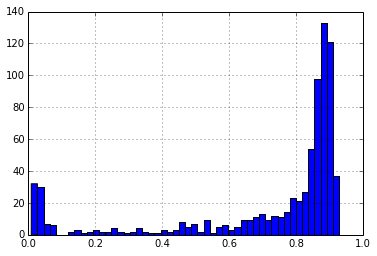

In [14]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('metaBEAT_read_stats.csv',index_col=0)
df['fraction'] = df['queries']/(df['total']*0.5)
df.fraction.hist(bins=50)

The final step in the processing will be global clustering of the centroids from all clusters from all samples to produce denovo OTUs. The temporary files from the global clustering and the final OTU table were written to the directory GLOBAL.

In [15]:
!ls GLOBAL/

global_centroids.fasta	global.uc		  metaBEAT-OTU-denovo.tsv
global_queries.fasta	metaBEAT-OTU-denovo.biom


The denovo OTU table (numbers are reads) can be briefly to see how OTUs are distributed across your samples. 

Detailed information on what metaBEAT did to each sample is contained in the log file log. It contains the exact commands that were run for each sample during each step of the process.

It's a large text file - look at the first 100 lines.

In [16]:
!head -n 100 log


metaBEAT - metaBarcoding and Environmental DNA Analyses tool
version: v.0.97.7-global


Fri Nov 25 11:29:03 2016

/usr/bin/metaBEAT_global.py -Q Querymap_final.txt --trim_qual 30 --read_crop 110 --trim_minlength 90 --merge --forward_only --product_length 110 --length_filter 100 --length_deviation 0.2 -@ L.Harper@2015.hull.ac.uk -n 5 -v


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'

taxonomy.db found at /usr/bin/taxonomy.db

Parsing querylist file

Number of samples to process: 768
Sequence input format: defaultdict(<type 'int'>, {'fastq': 768})
Barcodes for demultiplexing provided for 0 samples
Cropping instructions provided for 768 samples


Fri Nov 25 11:29:03 2016


##### processing query ID: B1_ #####


### READ QUALITY TRIMMING ###


trimming PE r

# Chimera detection

Some stats on the read counts before/after trimming, merging etc. are summarized for you in read_stats.csv.

Next stage of the processing is chimera detection and removal of putative chimeric sequences. We'll do that using uchime as implemented in vsearch.

In [17]:
cd ../

/home/working


In [18]:
!mkdir 2-chimera_detection

In [19]:
cd 2-chimera_detection

/home/working/chimera_detection


Convert reference database from Genbank to fasta format to be used in chimera detection.

Prepare Refmap file, i.e. text file that specifies the location and the format of the reference to be used.
The reference sequences in Genbank format are present in the Reference Alignment directory in subdirectories for each vertebrate group.

In [20]:
!echo '../Reference_Alignment/Amphibians/12S_UKamphibians_SATIVA_cleaned.gb\tgb\n' \
'../Reference_Alignment/Reptiles/12S_UKreptiles_SATIVA_cleaned.gb\tgb\n' \
'../Reference_Alignment/Mammals/12S_UKmammals_SATIVA_cleaned.gb\tgb\n' \
'../Reference_Alignment/Birds/12S_UKbirds_SATIVA_cleaned.gb\tgb\n' \
'../Reference_Alignment/Fish/20161026_INBO_12S_fishrefs_hfj_edit.fasta\tfasta\n' \
'../Reference_Alignment/Fish/custom_extended_12S_edit_10_2016.gb\tgb\n' \
'../Reference_Alignment/Fish/RhamphochromisEsox_mt.gb\tgb' > REFmap.txt

In [21]:
!cat REFmap.txt

../Reference_Alignment/Amphibians/12S_UKamphibians_SATIVA_cleaned.gb	gb
 ../Reference_Alignment/Reptiles/12S_UKreptiles_SATIVA_cleaned.gb	gb
 ../Reference_Alignment/Mammals/12S_UKmammals_SATIVA_cleaned.gb	gb
 ../Reference_Alignment/Birds/12S_UKbirds_SATIVA_cleaned.gb	gb
 ../Reference_Alignment/Fish/20161026_INBO_12S_fishrefs_hfj_edit.fasta	fasta
 ../Reference_Alignment/Fish/custom_extended_12S_edit_10_2016.gb	gb
 ../Reference_Alignment/Fish/RhamphochromisEsox_mt.gb	gb


In [22]:
!metaBEAT_global.py -h

usage: metaBEAT.py [-h] [-Q <FILE>] [-B <FILE>] [--g_queries <FILE>] [-v] [-s]
                   [-f] [-p] [-k] [-t] [-b] [-m <string>] [-n <INT>] [-E] [-e]
                   [--read_stats_off] [--PCR_primer <FILE>]
                   [--trim_adapter <FILE>] [--trim_qual <INT>] [--phred <INT>]
                   [--trim_window <INT>] [--read_crop <INT>]
                   [--trim_minlength <INT>] [--merge] [--product_length <INT>]
                   [--merged_only] [--forward_only] [--length_filter <INT>]
                   [--length_deviation <FLOAT>] [-R <FILE>] [--gb_out <FILE>]
                   [--rec_check] [--gi_to_taxid <FILE>] [--cluster]
                   [--clust_match <FLOAT>] [--clust_cov <INT>]
                   [--blast_db <PATH>] [--blast_xml <PATH>]
                   [--min_ident <FLOAT>] [--min_ali_length <FLOAT>]
                   [--bitscore_skim_LCA <FLOAT>] [--bitscore_skim_adjust_off]
                   [--min_bit <INT>] [--refpkg <DIR>] [--jplace <FILE>]


In [23]:
%%bash

metaBEAT_global.py \
-R REFmap.txt \
-f \
-@ L.Harper@2015.hull.ac.uk


metaBEAT - metaBarcoding and Environmental DNA Analyses tool
version: v.0.97.7-global


Wed Nov 30 16:35:41 2016

/usr/bin/metaBEAT_global.py -R REFmap.txt -f -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'

taxonomy.db found at /usr/bin/taxonomy.db

######## PROCESSING REFERENCE DATA ########


processing ../Reference_Alignment/Amphibians/12S_UKamphibians_SATIVA_cleaned.gb (containing 198 records)

total number of valid records: 198


processing ../Reference_Alignment/Reptiles/12S_UKreptiles_SATIVA_cleaned.gb (containing 112 records)

total number of valid records: 310


processing ../Reference_Alignment/Fish/custom_extended_12S_edit_10_2016.gb (containing 271 records)

total number of valid records: 581


processing ../Refer

Traceback (most recent call last):
  File "/usr/bin/metaBEAT_global.py", line 2439, in <module>
    out.write(BIOM_tables_per_method['OTU_denovo'].to_tsv()) #to_json('generaged by test', direct_io=out)
  File "/usr/local/lib/python2.7/dist-packages/biom/table.py", line 4027, in to_tsv
    observation_column_name)
  File "/usr/local/lib/python2.7/dist-packages/biom/table.py", line 1268, in delimited_self
    raise TableException("Cannot delimit self if I don't have data...")
biom.exception.TableException: Cannot delimit self if I don't have data...


This will produce refs.fasta.

In [24]:
!head refs.fasta

>AY585337|8443|Alytes obstetricans
CAAAGGTTTGGTCCTAGCCTTGTTATCAGCCCTGACTGAGATTACACATGCAAGTATCCGCCTCCCCGTGAAAATGCCCTTAAGCCCCCTCGCTAGAGGATAAGGAGCAGGTATCAGGCACTCTTTAAGCCCACAACACCTTGCATCGCCACACCCCCAAGGGAGTTCAGCAGTGATAAACATTGAGCATAAGCGAACAGCTTGACTCAGCTCCAGTCTATAGAGCCGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAAAGACTCAAACTGATAACCGTCGGCGTAAAGCGTGATTAAAGACCCCCCCCCCTAGAGTCAAATTACAACTAGGCCGTCGCACGCTTCAGTTGAATAGAGGCACTAATGCGAAAGCAACTCTACTATACCTGAACTCACGACCGCTAGGAAACAAACTGGGATTAGATACCCCACTATGCCTAGCCTTAAACATTGACAACTTACATTATTTCATCCGCCCGGGAACTACGAGCCGCAGCTTAAAACCCAAAGGACTTGGCGGTGCCCCAAACCCACCTAGAGGAGCCTGTTCTATAATCGATACCCCCCGCTTAACCTCACCACCCCTCGCCAGCAGCCTATATACCACCGTCGCCAGCCCACCTCATGAGAGAAAACAAGTAGGCATAATGGTAACCACCAAAACGTCAGGTCAAGGTGTAGCCTATGGGGCGGAAAGCAATGGGCTACACTTTCTACACAGAAAACTACGAAAGACTATTATGAAATCTAGTCTGAAGGCGGATTTAGTAGTAAAAAGATTCAAGAGTGTTCTTTTTAATCTGGCCCTGGGGCGCGCACACACCGCCCGTCACCCTCCTCAACTAACTCAACCCCCTAATTAAAAACTAACCAGTTAACAAGAAGAGGCAAGTCGTAACATGGTAAGTATACCGGAAGGTGTGCTTGGAACAA
>AY322321|45623|Pelophylax 

Now run chimera detection.

In [26]:
%%bash


for a in $(cut -f 1 ../1-trimming/Querymap.txt)
do
    if [ -s ../1-trimming/$a/$a\_trimmed.fasta ]
    then
        echo -e "\n### Detecting chimeras in $a ###\n"
        mkdir $a
        cd $a
        vsearch --uchime_ref ../../1-trimming/$a/$a\_trimmed.fasta --db ../refs.fasta \
        --nonchimeras $a-nonchimeras.fasta --chimeras $a-chimeras.fasta &> log 
        cd ..

    else
        echo -e "$a is empty"
    fi
done


### Detecting chimeras in B1_ ###


### Detecting chimeras in B2_ ###


### Detecting chimeras in B3_ ###


### Detecting chimeras in B4_ ###


### Detecting chimeras in Blank_ ###


### Detecting chimeras in F100_ ###


### Detecting chimeras in F101_ ###


### Detecting chimeras in F102_ ###


### Detecting chimeras in F103_ ###


### Detecting chimeras in F104_ ###


### Detecting chimeras in F105_ ###


### Detecting chimeras in F106_ ###


### Detecting chimeras in F107_ ###


### Detecting chimeras in F108_ ###


### Detecting chimeras in F109_ ###


### Detecting chimeras in F10_ ###


### Detecting chimeras in F110_ ###


### Detecting chimeras in F111_ ###


### Detecting chimeras in F112_ ###


### Detecting chimeras in F113_ ###


### Detecting chimeras in F114_ ###


### Detecting chimeras in F115_ ###


### Detecting chimeras in F116_ ###


### Detecting chimeras in F117_ ###


### Detecting chimeras in F118_ ###


### Detecting chimeras in F119_ ###


### Detecting chime